# Der Iris-Datensatz - Clustern

## Laden von CSV-Dateien

In [3]:
import numpy as np
fp = "iris.txt"  # oder "ML-Workshop.git/iris.txt" wenn außerhalb des Verzeichnisses gearbeitet wird
X = np.loadtxt(fp, delimiter=",", usecols=[0,1,2,3])
Y = np.loadtxt(fp, delimiter=",", usecols=[4], dtype=np.str)
print( X[0], Y[0] )

[5.1 3.5 1.4 0.2] Iris-setosa


X enthält Instanzattribute, Y enthält Klassenbezeichnungen. \
Verwenden Sie **set**, um alle möglichen Klassenwerte aus Y zu bestimmen:

In [4]:
classes = list(set(Y))
print(classes)

['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']


## Visualisierung der Iris-Daten

Daten können durch Matplotlib visualisiert werden, z.B. durch Plotten der ersten beiden Dimensionen der Irisdaten:

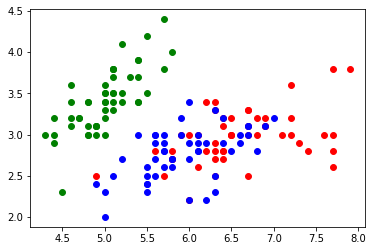

In [5]:
import matplotlib.pyplot as plt
colors = ["r", "g", "b"] # Farbe für jede Klasse definieren
x1, x2 = X[:,0], X[:,1] # Extrahieren aller Werte der ersten zwei Spalten

ax = plt.figure().add_subplot(111)

for (col, cls) in zip(colors, classes):
    # Instanzen der Klasse ’cls’ finden
    idx = np.where(Y == cls)[0]
    # draw data points and color them according to class
    s = ax.scatter(x1[idx], x2[idx], c=col, s=35)
plt.show()

## Clustern ungelabelter Daten

Laden eines Clustering-Verfahrens aus scikit-learn

sklearn.cluster.KMeans # **k-Means** \
sklearn.cluster.DBSCAN # **DBSCAN** \
sklearn.cluster.AgglomerativeClustering # **Hierarchisches Clustering** 

Clustern mit **fit** und Eingabe X starten:

clusterer.fit(X)

Information zu den Clustern oder Vorhersage des Clusters für neue Instanzen:

clusterer.cluster_centers \
clusterer.predict(Z)


## k-Means

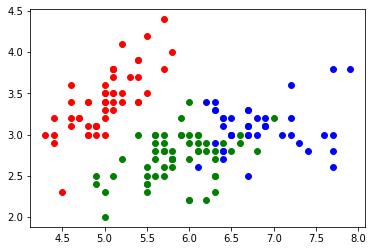

In [30]:
from sklearn import cluster 
k = 3 # Anzahl der Cluster definieren

clu = cluster.KMeans(k) # Initialisieren von k-Means
fit = clu.fit(X) # Durchführen des Clusterings

km = fit.labels_
classes_km = list(set(fit.labels_))
ax = plt.figure().add_subplot(111)

for (col, cls) in zip(colors, classes_km):
    # Instanzen der Klasse ’cls’ finden
    idx = np.where(km == cls)[0]
    # draw data points and color them according to class
    s = ax.scatter(x1[idx], x2[idx], c=col, s=35)
    #print(idx)
    
# Aufgabe: Für Vergleich auskommentieren und oben bei subplot Ziffer anpassen
#ax = plt.figure().add_subplot(212)

#for (col, cls) in zip(colors, classes):
    # Instanzen der Klasse ’cls’ finden
#    idx = np.where(Y == cls)[0]
    # draw data points and color them according to class
#    s = ax.scatter(x1[idx], x2[idx], c=col, s=35)

plt.show()


Clusterzentren ausgeben lassen und Vorhersage des Clusterlabels für neue Instanzen Z:

In [14]:
print(fit.cluster_centers_)

Z = [[6,2,4,1], [1,1,1,1]] # Definieren der neuen Instanzen
p = clu.predict(Z) # Vorhersage
print(p)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
[1 0]


## DBSCAN

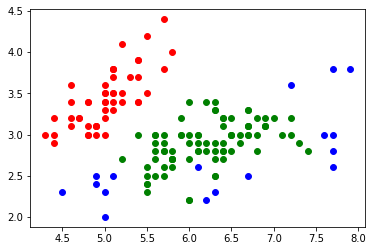

In [39]:
from sklearn.cluster import DBSCAN

clu = DBSCAN(eps=0.5) # Initialisieren von DBSCAN
fit = clu.fit(X) # Durchführen des Clusterings

dbscan = fit.labels_
classes_dbscan = list(set(dbscan))
ax = plt.figure().add_subplot(111)

for (col, cls) in zip(colors, classes_dbscan):
    # Instanzen der Klasse ’cls’ finden
    idx = np.where(dbscan == cls)[0]
    # draw data points and color them according to class
    s = ax.scatter(x1[idx], x2[idx], c=col, s=35)
    #print(idx)
    
# Für Vergleich auskommentieren und oben bei subplot Ziffer anpassen
#ax = plt.figure().add_subplot(212)

#for (col, cls) in zip(colors, classes):
    # Instanzen der Klasse ’cls’ finden
#    idx = np.where(Y == cls)[0]
    # draw data points and color them according to class
#    s = ax.scatter(x1[idx], x2[idx], c=col, s=35)

plt.show()

# Aufgabe: Variieren Sie den Parameter eps. Was könnte damit reguliert werden?

## Hierarchisches/Agglomeratives Clustern 

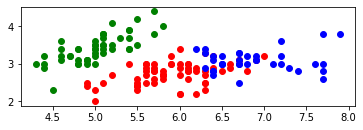

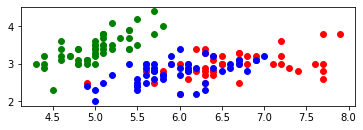

In [37]:
from sklearn.cluster import AgglomerativeClustering
k = 3 # Anzahl der Cluster definieren

clu = ? # Initialisieren des Agglomerativen Clusterings
fit = clu.fit_predict(X) # Durchführen des Clusterings. 
# Was ist der Unterschied  zwischen fit und fit_predict?

classes_ac = list(set(fit))
ax = plt.figure().add_subplot(111)

for (col, cls) in zip(colors, classes_ac):
    # Instanzen der Klasse ’cls’ finden
    idx = np.where(fit == cls)[0]
    # draw data points and color them according to class
    s = ax.scatter(x1[idx], x2[idx], c=col, s=35)
    #print(idx)
    
# Für Vergleich auskommentieren und oben bei subplot Ziffer anpassen
#ax = plt.figure().add_subplot(212)

#for (col, cls) in zip(colors, classes):
    # Instanzen der Klasse ’cls’ finden
#    idx = np.where(Y == cls)[0]
    # draw data points and color them according to class
#    s = ax.scatter(x1[idx], x2[idx], c=col, s=35)

plt.show()